<a href="https://colab.research.google.com/github/audrb1999/ML-DL-Study/blob/main/%EC%8B%AC%EC%B8%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%96%B4%ED%94%8C%EB%A6%AC%EC%BC%80%EC%9D%B4%EC%85%98%20%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/19_Momentum_%EC%B5%9C%EC%A0%81%ED%99%94_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momentum 최적화 알고리즘

모멘텀이 있는 경사 하강법은 일반적인 경사 하강법보다 왠만해서는 항상 더 빠르게 동작합니다.

기본적인 아이디어는 경사에 대한 지수 가중 평균을 계산하는 것입니다.

그리고 그 값으로 가중치를 업데이트 합니다!

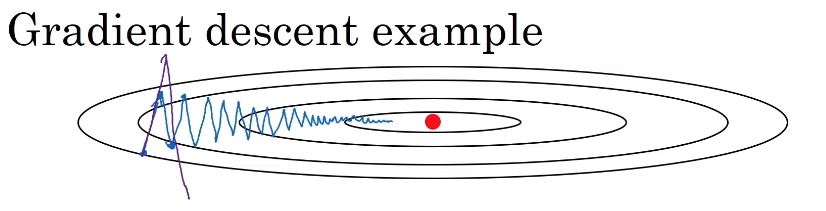

위는 일반적인 경사 하강법, 미니 배치 경사 하강법입니다.

위아래로 진동하며 최솟값에 가까워집니다, 하지만 이렇게 진동하게되면 속도가 느려지고 더 큰 학습률을 사용하는 것을 막습니다.

더 큰 학습률을 사용할 경우 보라색 선처럼 오버슈팅 하게되어 발산해 버립니다.

따라서 학습률이 너무 크지않아야 진동이 커지는 것을 막을 수 있습니다.


즉 여기서는 진동이 적어지기 위해(수직 움직임을 줄이기 위해) 낮은 학습률을 원하지만 수평축에서는 더 빠른 학습을 원합니다.

미니 배치에 대한 모멘텀 최적화를 만들어보겠습니다.

$V_{dw} = \beta * V_{[dw]} + (1 - \beta)dw$

$V_{db} = \beta * V_{[db]} + (1 - \beta)db$

> 이전에 배운 지수 가중 이동평균과 유사합니다

$w = w - \alpha * dw$ 

$b = b - \alpha * db$

위 사진 처럼 진동하는 경사 하강법의 평균을 구하면 수직 방향의 진동이 0에 가까운 값으로 평균이 만들어집니다.

- 진행을 늦추고 싶은 수직 방향에서는 양수와 음수를 평균하기에 평균이 0이되고 수평 방향에서 모든 도함수는 최소값을 가리키고 있기 때문에 수평 방향의 평균은 꽤 큰값을 가집니다(크게 움직임)

이 알고리즘은 더 직선의 길을 가거나 진동을 줄일 수 있게 합니다.

dw db는 convex down 함수 처럼 밥 그릇 모양일 때 경사에 들어가게 되면 가속을 시켜줍니다.

그리고 $\beta$는 1보다 약간 작은 값을 가지는데 그 때문에 마찰력 역할을 해주어 경사를 지날 때 제한없이 빨라지는 것을 막습니다.

이렇게 학습률과 베타라는 지수 가중 평균을 제어하는 두 가지의 하이퍼피라미터가 있습니다.

온도에 대해서는 베타는 0.9일 때 잘 작동합니다. (다른 부분에서도 0.9가 대체로 좋은 결과를 보입니다.)

여러 값들을 시도해서 자기가 맡은 문제에 대해 최적의 하이퍼파라미터를 찾아보세요

여기서도 편향 보정을 해주면 초반값들에 대해 편향이 제거되 편향 추정이 일어나지 않지만 대체적으로 10번 반복 뒤에는 이동 평균이 충분이 진행돼서 편향 추정이 더 이상 일어나지 않기 때문입니다.


> 경사 하강법이나 모멘텀 구현할 때 편향 보정을 하는 사람은 거의 없습니다.

모멘텀 관련 논문을 봐보면

$V_{dw} = \beta * V_{[dw]} + (1 - \beta)dw$가 아닌

$V_{dw} = \beta * V_{[dw]} + dw$로 자주 쓰이는 모습이 보이는데 이것으로 인해 $v_{dw}$가 $\frac 1 {(1-\beta)}$에 대한 계수로 스케일링 되는 효과가 생깁니다.

> $(1 + \beta)$를 곱해주지 않았으니 나눠준 효과가 생긴 것!

앤드류 교수님은 저렇게하면 학습률을 조정해줘야되서 잘 안쓰신다고 함!

즉 바꾸면 학습률도 다시 조정해줘야함! 두 개다 잘 사용되는 방법